
Array size = 100
Bubble Sort: 0.00155 sec
Quick Sort (Random): 0.00026 sec
Quick Sort (Average): 0.00037 sec
Merge Sort: 0.00028 sec
Heap Sort: 0.00032 sec

Array size = 500
Bubble Sort: 0.02467 sec
Quick Sort (Random): 0.00151 sec
Quick Sort (Average): 0.00229 sec
Merge Sort: 0.00183 sec
Heap Sort: 0.00203 sec

Array size = 1000
Bubble Sort: 0.08231 sec
Quick Sort (Random): 0.00242 sec
Quick Sort (Average): 0.00408 sec
Merge Sort: 0.00211 sec
Heap Sort: 0.00268 sec

Array size = 5000
Bubble Sort: 2.75023 sec
Quick Sort (Random): 0.01476 sec
Quick Sort (Average): 0.02532 sec
Merge Sort: 0.02422 sec
Heap Sort: 0.03105 sec

Array size = 10000
Bubble Sort: 9.73195 sec
Quick Sort (Random): 0.01747 sec
Quick Sort (Average): 0.02722 sec
Merge Sort: 0.02466 sec
Heap Sort: 0.03215 sec


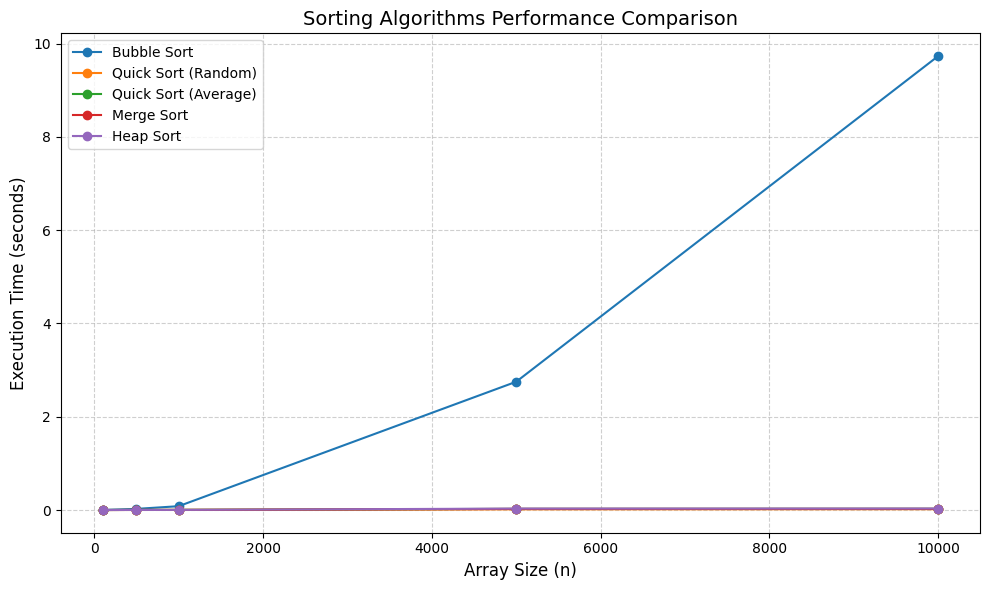

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Sorting algorithms

def bad_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def quick_sort_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort_random(left) + middle + quick_sort_random(right)

def quick_sort_average(arr):
    if len(arr) <= 1:
        return arr
    pivot = (arr[0] + arr[len(arr)//2] + arr[-1]) / 3
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort_average(left) + middle + quick_sort_average(right)

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def heapify(arr, n, i):
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr


# Experiment and Plot
def test_algorithms():
    sizes = [100, 500, 1000, 5000, 10000]
    results = {
        "Bubble Sort": [],
        "Quick Sort (Random)": [],
        "Quick Sort (Average)": [],
        "Merge Sort": [],
        "Heap Sort": []
    }

    for size in sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        print(f"\nArray size = {size}")

        for name, func in [
            ("Bubble Sort", bad_sort),
            ("Quick Sort (Random)", quick_sort_random),
            ("Quick Sort (Average)", quick_sort_average),
            ("Merge Sort", merge_sort),
            ("Heap Sort", heap_sort)
        ]:
            data = arr.copy()
            start = time.time()
            func(data)
            end = time.time()
            elapsed = end - start
            results[name].append(elapsed)
            print(f"{name}: {elapsed:.5f} sec")

    # --- Plotting ---
    plt.figure(figsize=(10,6))
    for name, times in results.items():
        plt.plot(sizes, times, marker='o', label=name)

    plt.title("Sorting Algorithms Performance Comparison", fontsize=14)
    plt.xlabel("Array Size (n)", fontsize=12)
    plt.ylabel("Execution Time (seconds)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.savefig("sorting_comparison_plot.png", dpi=300)
    plt.show()
test_algorithms()
